# Logistic Regression

What’s the best (or at least the most popular) Halloween candy? That was the question this dataset was collected to answer. Data was collected by creating a website where participants were shown [presenting two fun-sized candies and asked to click on the one they would prefer to receive](http://walthickey.com/2017/10/18/whats-the-best-halloween-candy/). In total, more than 269 thousand votes were collected from 8,371 different IP addresses.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('candy-data.csv')

In [4]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [14]:
df.sample(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
24,HersheyÕs Milk Chocolate,1,0,0,0,0,0,0,1,0,0.430,0.918,56.490501
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451
13,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924
27,Junior Mints,1,0,0,0,0,0,0,0,1,0.197,0.511,57.219250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


In [13]:
df['competitorname'].unique().size

85

In [47]:
df.drop("competitorname", inplace = True, axis=1) # Gereksiz

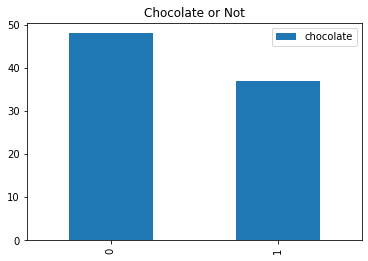

In [45]:
df['chocolate'].value_counts().plot.bar(legend=1, title="Chocolate or Not");

In [49]:
y = df['chocolate'].values
X = df.drop(["chocolate"], axis = 1)

In [51]:
df.isnull().sum()

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

## Preprocessing

In [57]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.3, random_state=25, shuffle=1)

## Model Section

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [76]:
log_reg = LogisticRegression(random_state=25, solver="liblinear", verbose=1)
log_reg_model = log_reg.fit(X_train,Y_train)

[LibLinear]iter  1 act 1.984e+01 pre 1.796e+01 delta 2.146e+00 f 4.090e+01 |g| 7.011e+01 CG   2
iter  2 act 3.416e-02 pre 3.400e-02 delta 2.146e+00 f 2.105e+01 |g| 4.157e+01 CG   1
iter  3 act 2.330e+00 pre 2.155e+00 delta 2.146e+00 f 2.102e+01 |g| 3.977e+00 CG   4
iter  4 act 4.523e-02 pre 4.421e-02 delta 2.146e+00 f 1.869e+01 |g| 2.678e+00 CG   2
iter  5 act 3.948e-03 pre 3.945e-03 delta 2.146e+00 f 1.864e+01 |g| 1.982e-01 CG   3
iter  6 act 2.857e-05 pre 2.857e-05 delta 2.146e+00 f 1.864e+01 |g| 1.115e-02 CG   4


In [77]:
log_reg_model.intercept_

array([-1.4263686])

In [78]:
log_reg_model.coef_

array([[-2.20071913, -0.18647828,  0.72320327,  0.40397726,  0.48587012,
         0.02207001,  0.93455582, -0.48928937, -0.25417328,  0.42866006,
         0.04117556]])

In [83]:
Y_pred = log_reg_model.predict(X_test)

In [84]:
accuracy_score(Y_test, Y_pred)

0.8846153846153846

In [86]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.85      0.92      0.88        12

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.88        26



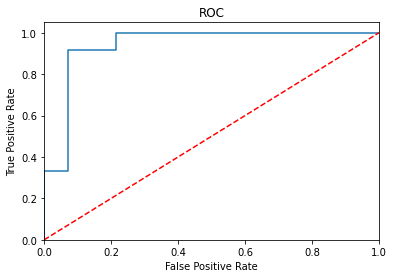

In [88]:
roc_auc = roc_auc_score(Y_test, log_reg_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(Y_test, log_reg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [92]:
log_reg_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 25,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}